# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

# Importing the cleaned data sets

In [2]:
choc = pd.read_csv('cleaned_chocolate.csv')
chocoTaste = pd.read_csv('chocolate_taste_dataset.csv')

# Visualizing Distribution of Cocoa Percent

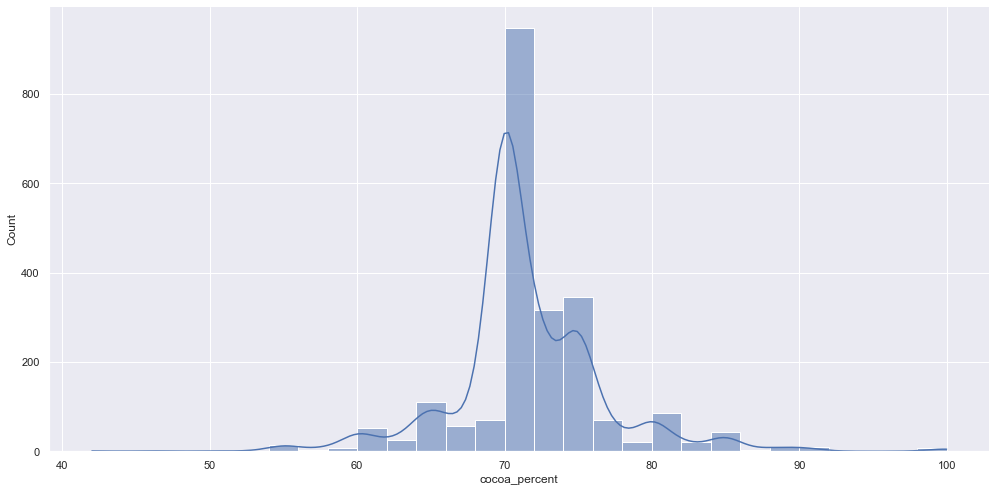

In [3]:
sb.displot(choc['cocoa_percent'], kde = True, binwidth = 2, height = 7, aspect = 2)
plt.show()

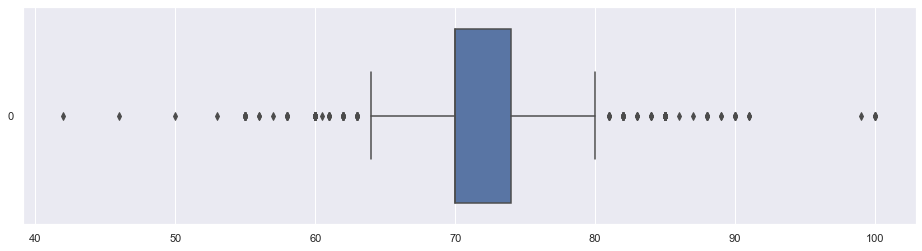

In [4]:
f = plt.figure(figsize=(16,4))
sb.boxplot(data = choc["cocoa_percent"], orient = 'h')
plt.show()

**Removing outliers for cocoa_percent using IQR rule**

In [5]:
q3 = choc["cocoa_percent"].quantile(0.75)
q1 = choc["cocoa_percent"].quantile(0.25)
iqr = q3-q1
choc = choc[(choc["cocoa_percent"]>=(q1-1.5*iqr)) & (choc["cocoa_percent"]<=(q3+1.5*iqr))]

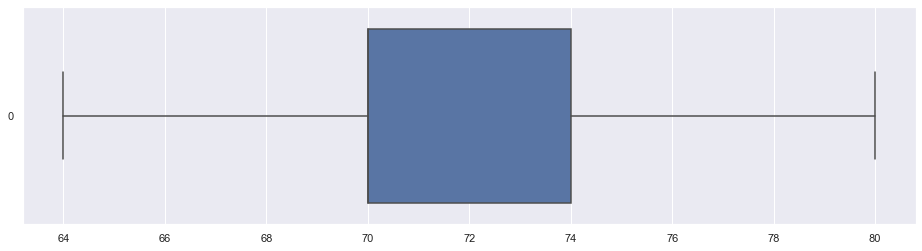

In [6]:
f = plt.figure(figsize=(16,4))
sb.boxplot(data = choc["cocoa_percent"], orient = 'h')
plt.show()

## Relationship between Cocoa Percent and Rating Category

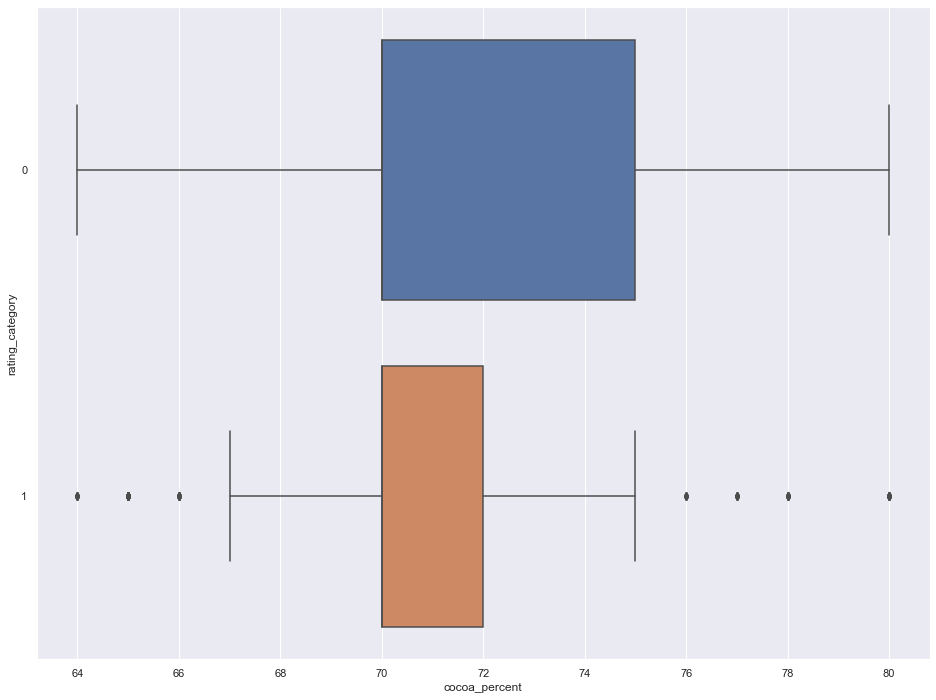

In [7]:
f = plt.figure(figsize=(16,12))
sb.boxplot(x = "cocoa_percent", y = "rating_category", data = choc, orient = 'h')
plt.show()

High rating chocolate seems to be have cocoa_percent more concentrated between 67% and 75%

# Relationship between Ingredients and Rating Category

We are examining the changes in the distribution of `rating_category` with the presence or absence of specific ingredients

## Creating helper functions to calculate the percentages

In [8]:
def ratingProportionPlot(data, y, ylabel = None, title = None):
    i = len(data[y].value_counts())
    graph = pd.crosstab(index = data[y],
                        columns = data['rating_category'],
                        normalize = 'index')[[1, 0]]
    graph.plot(kind = 'barh',
               stacked = True,
               figsize = (15,i*1.5),
               title = title,
               xlabel = ylabel)
    plt.show()

def ratingPercentagePlot(data, x, xlabel, height = 5, aspect = 1, ylim = 50):
    palette = {1:(0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
               0:(0.3333333333333333, 0.6588235294117647, 0.40784313725490196)}

    new = data.groupby(data[x])['rating_category'].value_counts(normalize=True)
    new = new.mul(100).rename('Percentage').reset_index()
    new = new.rename(columns = {x:xlabel})
    new = new.rename(columns = {'rating_category':'Rating Category'})

    g = sb.catplot(x=xlabel, y='Percentage', hue='Rating Category', kind='bar', data=new,
                   palette=palette, height=height, aspect=aspect)
    g.ax.set_ylim(0,ylim)

    for p in g.ax.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)
    
    plt.show()

**Cocoa Butter**

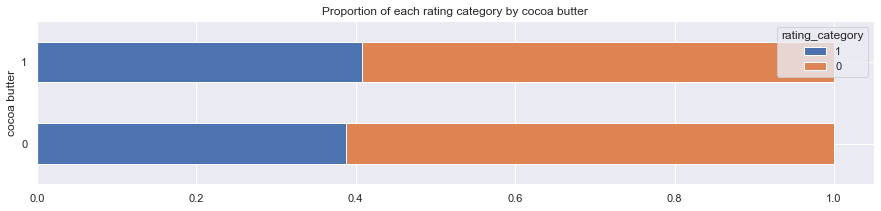

In [9]:
ratingProportionPlot(data = choc, y = 'cocoa_butter', ylabel = 'cocoa butter',
                     title = 'Proportion of each rating category by cocoa butter')

Specific percentage of each rating category when there is cocoa butter vs no cocoa butter

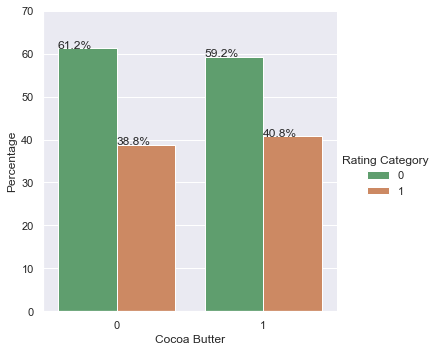

In [11]:
ratingPercentagePlot(data = choc, x = 'cocoa_butter', xlabel = 'Cocoa Butter', ylim = 70)

**Vanilla**

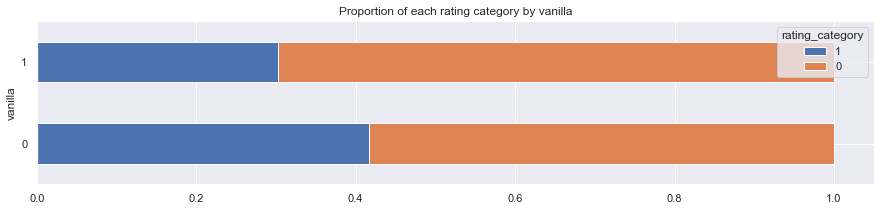

In [12]:
ratingProportionPlot(data = choc, y = 'vanilla', ylabel = 'vanilla',
                     title = 'Proportion of each rating category by vanilla')

Specific percentage of each rating category when there is vanilla vs no vanilla

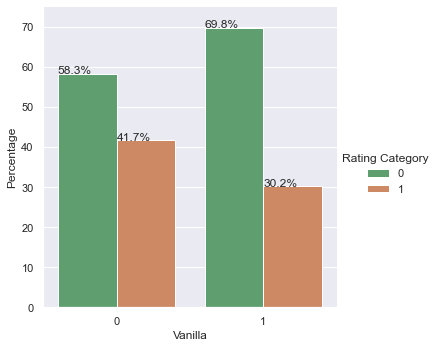

In [14]:
ratingPercentagePlot(data = choc, x = 'vanilla', xlabel = 'Vanilla', ylim = 75)

**Lecithin**

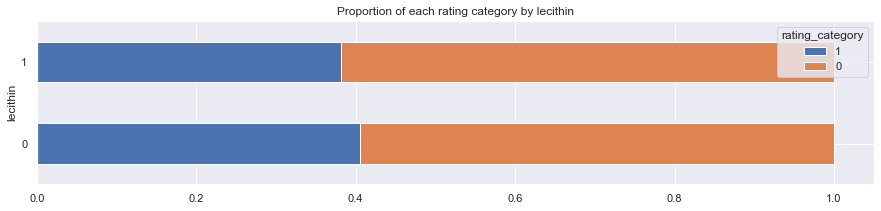

In [15]:
ratingProportionPlot(data = choc, y = 'lecithin', ylabel = 'lecithin',
                     title = 'Proportion of each rating category by lecithin')

Specific percentage of each rating category when there is lecithin vs no lecithin

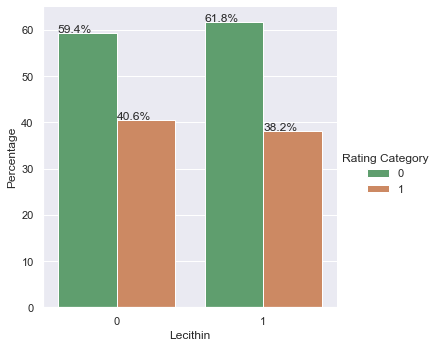

In [17]:
ratingPercentagePlot(data = choc, x = 'lecithin', xlabel = 'Lecithin', ylim = 65)

**Salt**

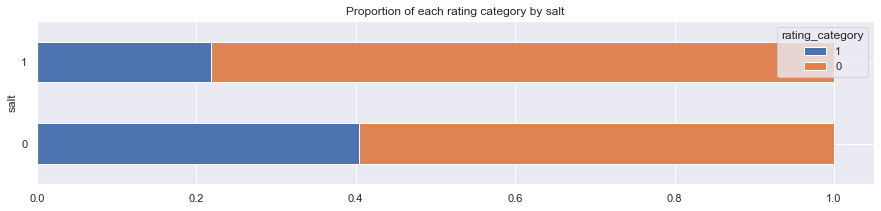

In [18]:
ratingProportionPlot(data = choc, y = 'salt', ylabel = 'salt',
                     title = 'Proportion of each rating category by salt')

Specific percentage of each rating category when there is salt vs no salt

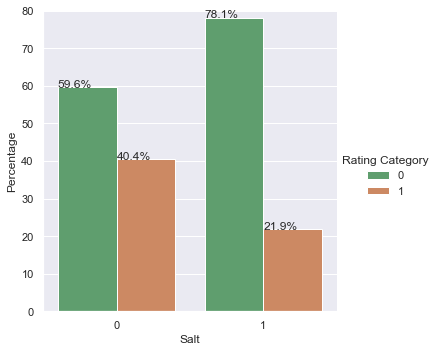

In [20]:
ratingPercentagePlot(data = choc, x = 'salt', xlabel = 'Salt', ylim = 80)

**Sugar**

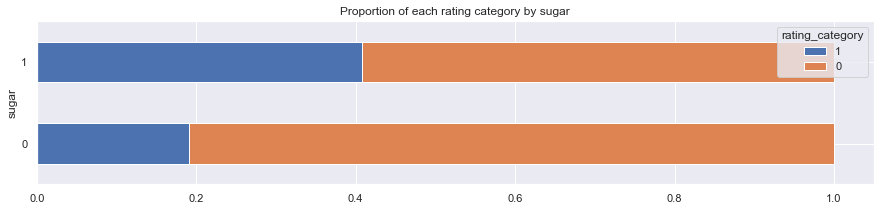

In [21]:
ratingProportionPlot(data = choc, y = 'sugar', ylabel = 'sugar',
                     title = 'Proportion of each rating category by sugar')

Specific percentage of each rating category when there is sugar vs no sugar

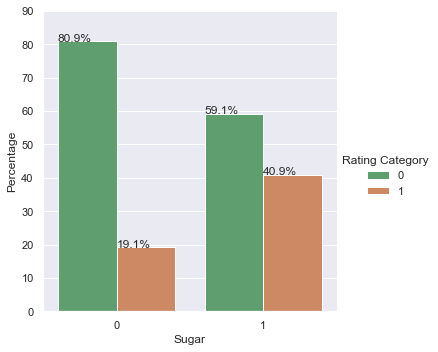

In [23]:
ratingPercentagePlot(data = choc, x = 'sugar', xlabel = 'Sugar', ylim = 90)

**Sweetener**

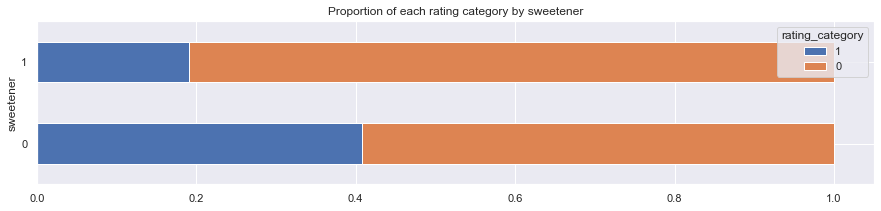

In [24]:
ratingProportionPlot(data = choc, y = 'sweetener_without_sugar', ylabel = 'sweetener',
                     title = 'Proportion of each rating category by sweetener')

Specific percentage of each rating category when there is sweetener vs no sweetener

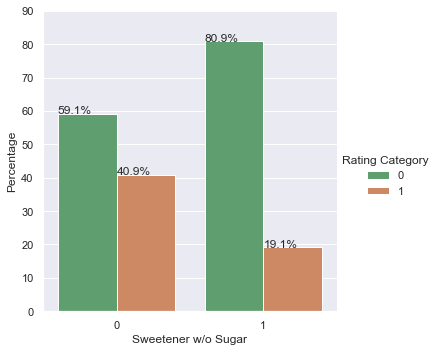

In [26]:
ratingPercentagePlot(data = choc, x = 'sweetener_without_sugar', xlabel = 'Sweetener w/o Sugar', ylim = 90)

**Correlation between Sugar and Sweetener without Sugar**

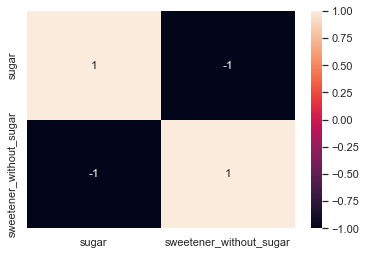

In [28]:
sugars = pd.DataFrame(choc[['sugar', 'sweetener_without_sugar']]).astype('int')
sb.heatmap(sugars.corr(), annot=True)
plt.show()

We observe that `sugar` and `sweetener_without_sugar` have perfect negative correlation with each other, therefore we can drop one column.<br>
Interesting note: All dark chocolate in our dataset requires some forms of sweetener in it.

In [29]:
choc = choc.drop(columns='sweetener_without_sugar')

## Frequency of the number of ingredients

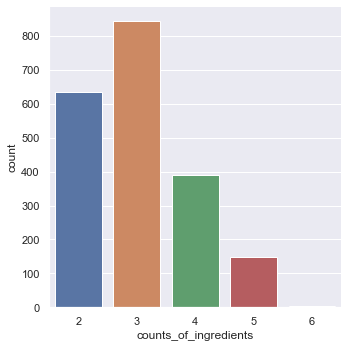

In [30]:
sb.catplot(x = 'counts_of_ingredients', data = choc, kind = 'count')
plt.show()

Most dark chocolate bars have between 2-5 ingredients, with chocolate bars having 5 ingredients being quite rare.
Chocolate bars with all 6 ingredients are clear outliers, therefore we can remove it. This could be due to the fact that the columns 'sugar' and 'sweetener_without_sugar' are negatively correlated with each other, which we have dropped from above.

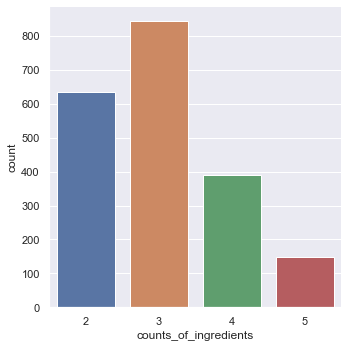

In [31]:
choc = choc[choc['counts_of_ingredients'] <= 5]
sb.catplot(x = 'counts_of_ingredients', data = choc, kind = 'count')
plt.show()

## Relationship between Number of ingredients and Proportion of Rating Category

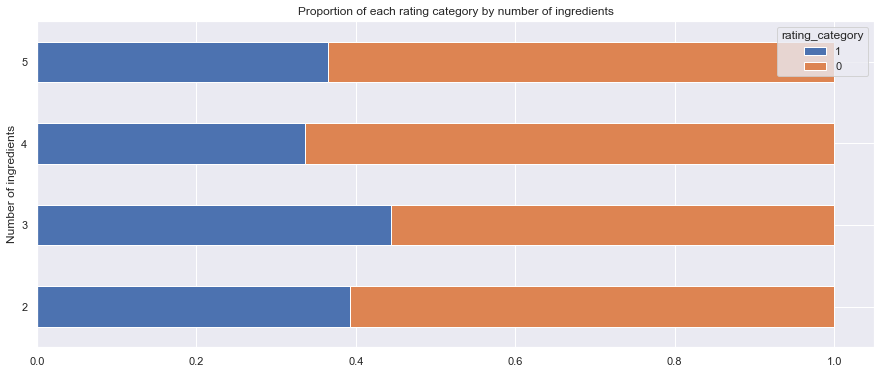

In [32]:
ratingProportionPlot(data = choc, y = 'counts_of_ingredients', ylabel = 'Number of ingredients',
                     title = 'Proportion of each rating category by number of ingredients')

Specific percentage of each rating category by number of ingredients

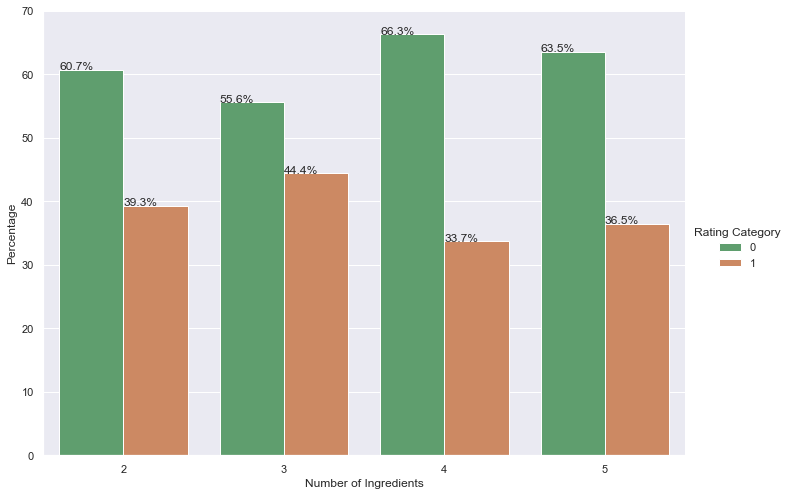

In [34]:
ratingPercentagePlot(data = choc, x = 'counts_of_ingredients', xlabel = 'Number of Ingredients',
                     height = 7, aspect = 1.4, ylim = 70)

## Visualizing Distribution of Number of taste

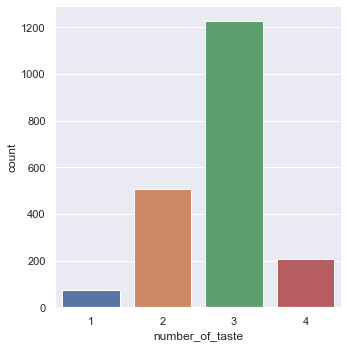

In [35]:
sb.catplot(x = 'number_of_taste', data = choc, kind = 'count')
plt.show()

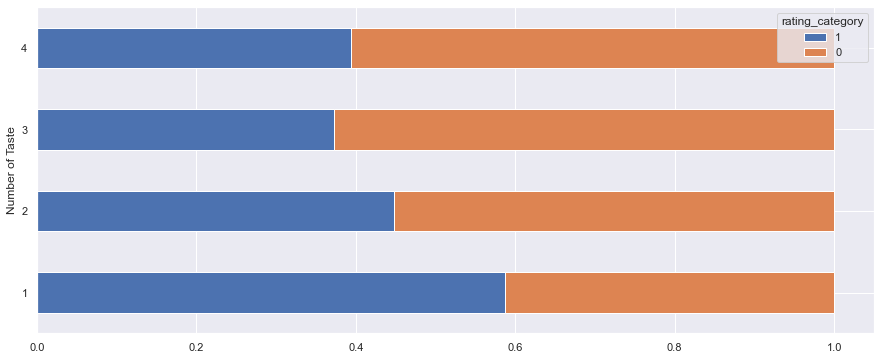

In [36]:
ratingProportionPlot(data = choc, y = 'number_of_taste', ylabel = 'Number of Taste')

Specific percentage of each rating category by number of taste

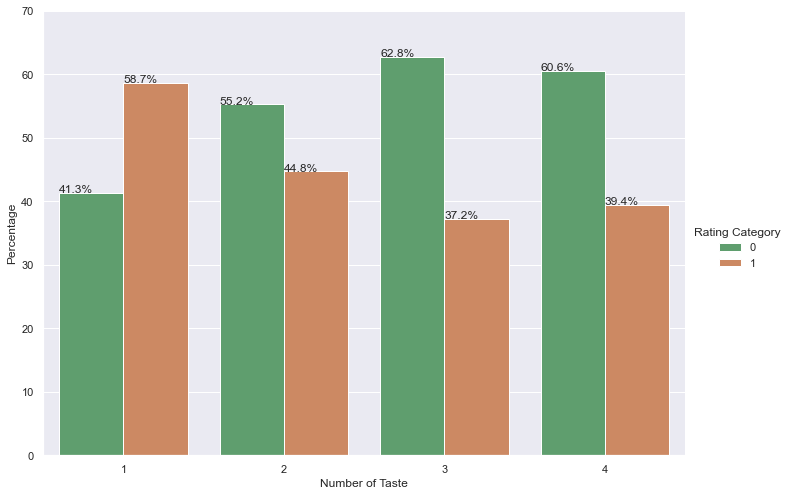

In [38]:
ratingPercentagePlot(data = choc, x = 'number_of_taste', xlabel = 'Number of Taste',
                     height = 7, aspect = 1.4, ylim = 70)

## Correlation between different ingredients and rating category

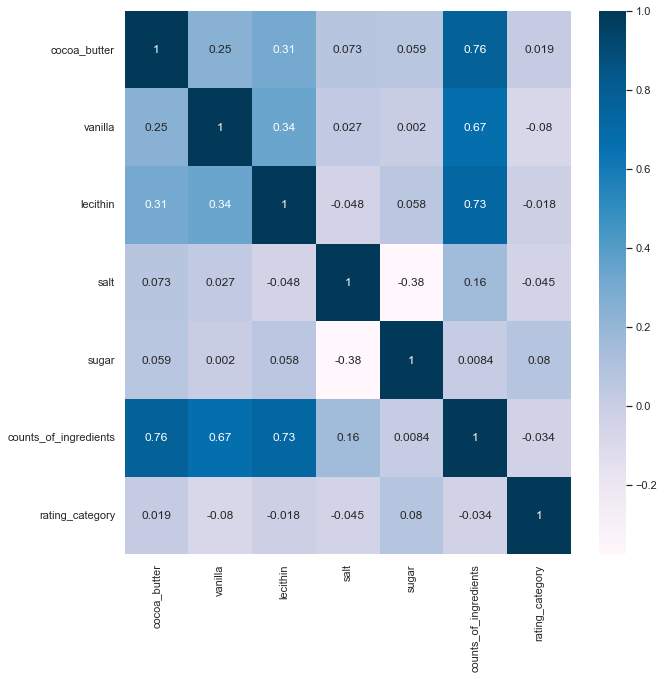

In [39]:
fig = plt.figure(figsize=(10,10))
ingredients = pd.DataFrame(choc[['cocoa_butter', 'vanilla', 'lecithin', 'salt',
                                 'sugar', 'counts_of_ingredients', 'rating_category']]).astype('int')
sb.heatmap(ingredients.corr(), annot=True, cmap='PuBu')
plt.show()

correlation heatmap may not be really informative of whether correlation exists between ingredients and rating category

## Further investigation using the Chi-squared Test

In [40]:
# importing the libraries
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [41]:
nameslist = []
chi2list = []

for i in ingredients.columns:
    if i == 'rating_category':
        continue
    chisq, p, dof, expected = chi2_contingency(pd.crosstab(choc[i], choc['rating_category']))
    nameslist.append(i)
    chi2list.append(chisq)

chi2_df = pd.DataFrame({'ingredients':nameslist, 'chi2':chi2list})
chi2_df

,ingredients,chi2
0,cocoa_butter,0.677670
1,vanilla,12.351849
2,lecithin,0.582763
3,salt,3.388748
4,sugar,12.063983
5,counts_of_ingredients,14.251581


**Interpreting test statistics**<br>
Null Hypothesis: The variables have no relationship with rating category

Degree of Freedom = (number of columns - 1)*(number of rows - 1)<br>
Probability = 0.95<br>
If chi-square statistic >= critical value, then we reject null hypothesis

In [42]:
dof = (2-1)*(3-1)
prob = 0.95
critical = chi2.ppf(prob, dof)
print("Critical value =", critical)

Critical value = 5.991464547107979


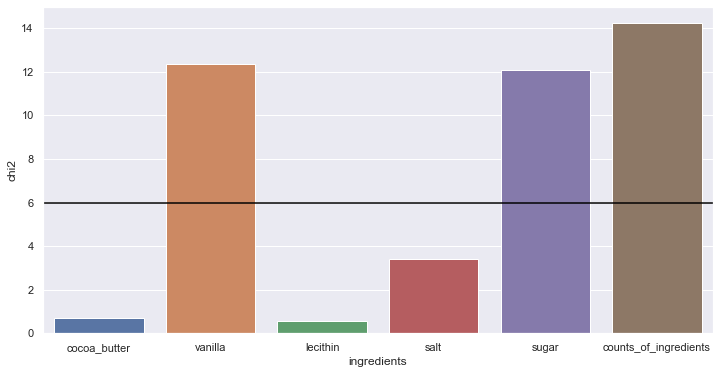

In [43]:
fig = plt.figure(figsize=(12,6))
g = sb.barplot(x = 'ingredients', y = 'chi2', data = chi2_df)
g.axhline(critical, c = 'black')
plt.show()

We can accept the null hypothesis for `cocoa_butter`, `lecithin` and `salt`<br>
Whereas the presence of `vanilla` and `sugar`, as well as the `counts_of_ingredients` may have some relationship with `rating_category`

## Relationship between Country of Bean Origin and Proportion of Rating Category

Extracting countries with at least 40 data points for visualization

In [44]:
beanOriginCounts = pd.DataFrame(choc['country_of_bean_origin'].value_counts())
beanOriginTop = beanOriginCounts[beanOriginCounts['country_of_bean_origin'] > 40].reset_index()
beanOriginTop

,index,country_of_bean_origin
0,Venezuela,220
1,Peru,188
2,Dominican republic,182
3,Ecuador,159
4,Madagascar,151
5,Blend,101
6,Nicaragua,87
7,Bolivia,67
8,Brazil,65
9,Tanzania,62


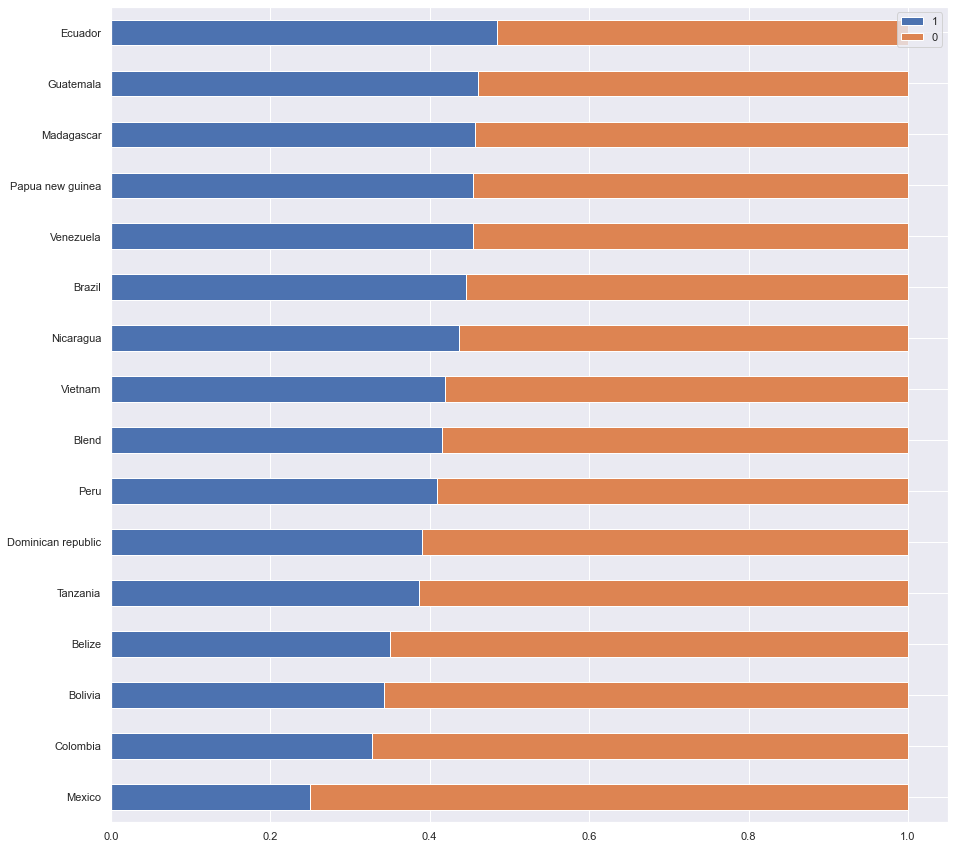

In [46]:
flag = 0
for country in beanOriginTop['index']:
    temp = choc[choc['country_of_bean_origin'] == country].copy()
    temp = pd.DataFrame(temp['rating_category'].value_counts(normalize=True)).T.rename({'rating_category':country})
    if flag == 0:
        bean = temp.copy()
        flag += 1
    else:
        bean = pd.concat([bean, temp], axis = 0)

bean = bean[[1, 0]]
bean = bean.sort_values(1)

bean.plot(kind = 'barh', stacked = True, figsize = (15,15))
plt.show()

This time we observe quite a clear impact on rating category for each country of bean origin

## Relationship between Taste and Proportion of Rating Category

Extracting tastes with at least 50 data points for visualization

In [47]:
chocoTasteTop = chocoTaste[chocoTaste['count_of_taste'] >= 50]
chocoTasteTop

,taste,count_of_taste
0,nutty,238
1,sweet,237
2,cocoa,203
3,roasty,198
4,creamy,184
5,earthy,164
6,sandy,153
7,fatty,149
8,floral,133
9,intense,132


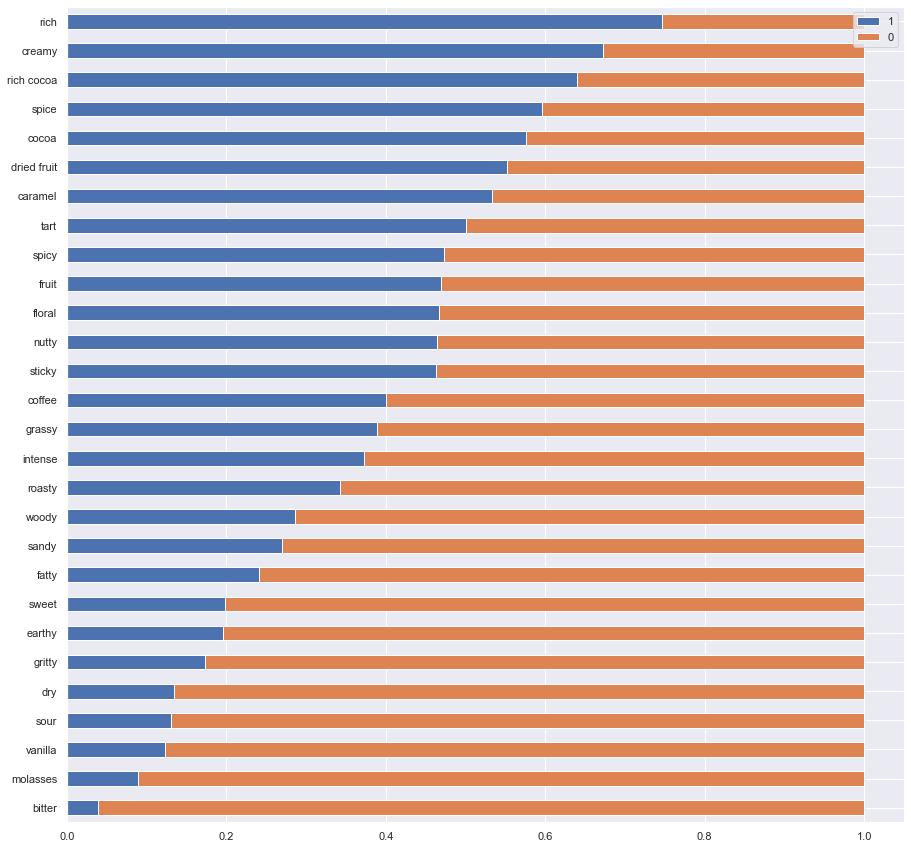

In [49]:
flag = 0
for taste in chocoTasteTop['taste']:
    temp = choc[(choc['first_taste'] == taste) |
                (choc['second_taste'] == taste) |
                (choc['third_taste'] == taste) |
                (choc['fourth_taste'] == taste)].copy()
    temp = pd.DataFrame(temp['rating_category'].value_counts(normalize=True)).T.rename({'rating_category':taste})
    if flag == 0:
        tastes = temp.copy()
        flag = flag+1
    else:
        tastes = pd.concat([tastes, temp], axis = 0)

tastes = tastes[[1, 0]]
tastes = tastes.sort_values(1)

tastes.plot(kind = 'barh', stacked = True, figsize = (15,15))
plt.show()

Once again, we observe a clear impact on rating category based on its described taste and feeling

## Examining the relationships between different groups of variables

Between `cocoa_percent`, `counts_of_ingredients` and `rating_category`

<AxesSubplot:xlabel='rating_category', ylabel='cocoa_percent'>

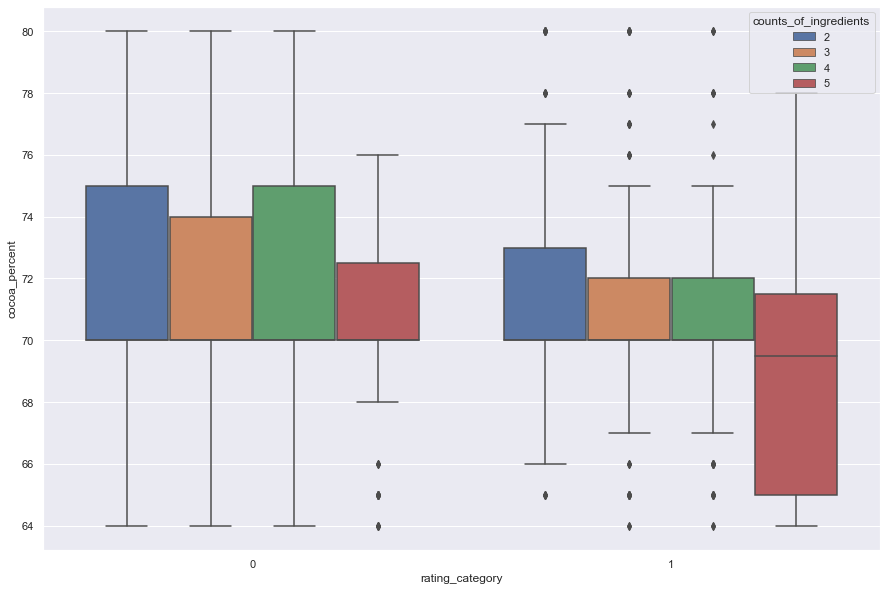

In [50]:
f = plt.figure(figsize=(15,10))
sb.boxplot(y = "cocoa_percent", x = "rating_category", data = choc, hue = "counts_of_ingredients", orient = "v")

Some combinations of `counts_of_ingredients` and `cocoa_percent` are more favorable for higher ratings. Such as `cocoa_percent` in the 66-70% range with 5 ingredients

Between `cocoa_percent`, `number_of_taste` and `rating_category`

<AxesSubplot:xlabel='rating_category', ylabel='cocoa_percent'>

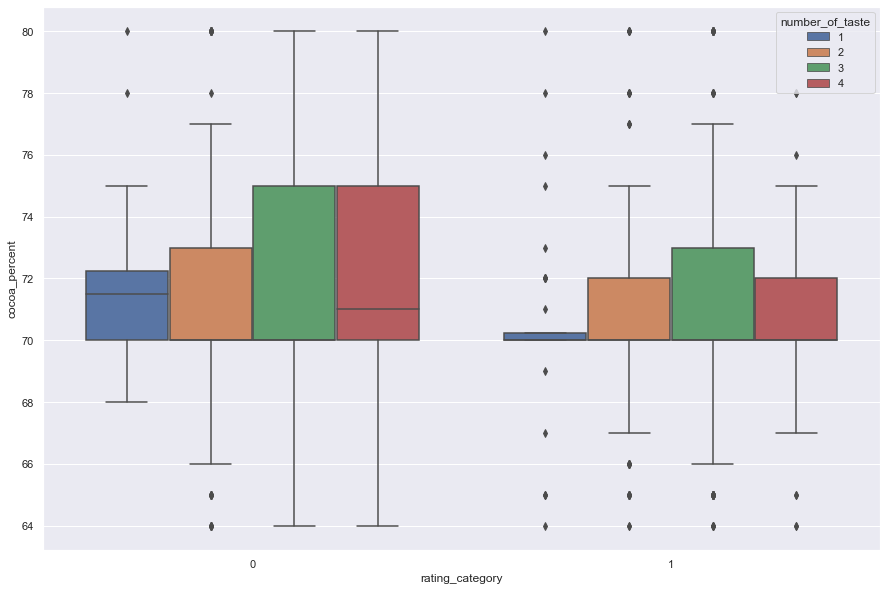

In [51]:
f = plt.figure(figsize=(15,10))
sb.boxplot(y = "cocoa_percent", x = "rating_category", data = choc, hue = "number_of_taste", orient = "v")

Investigating different rating categories

In [53]:
high = choc[choc["rating_category"] == 1]
not_high = choc[choc["rating_category"] == 0]

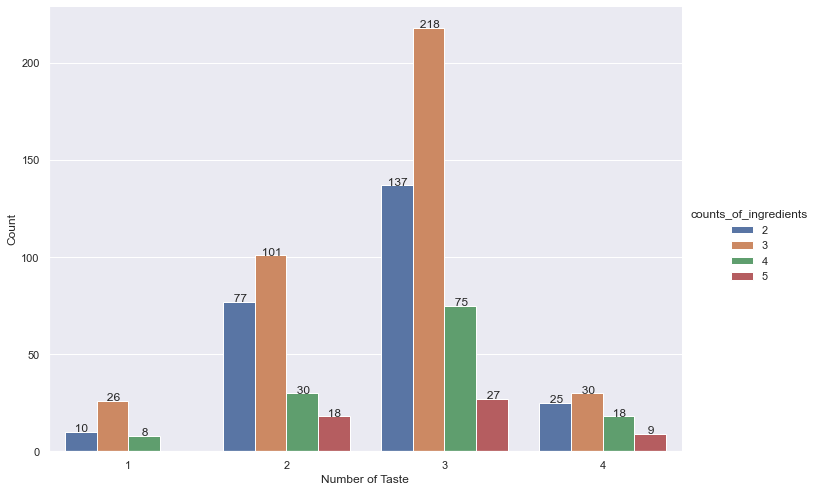

In [54]:
new = high.groupby(high['number_of_taste'])['counts_of_ingredients'].value_counts()
new = new.rename('Count').reset_index()
new = new.rename(columns = {'number_of_taste':'Number of Taste'})

g = sb.catplot(x='Number of Taste', y='Count', hue='counts_of_ingredients', kind='bar', data=new,
               height=7, aspect=1.4)

for p in g.ax.patches:
    if p.get_height() != p.get_height():
        txt = ''
        txt_x = 0
        txt_y = 0
    else:
        txt = '          '+str(int(p.get_height()))
        txt_x = p.get_x()
        txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt,ha='center')

plt.show()

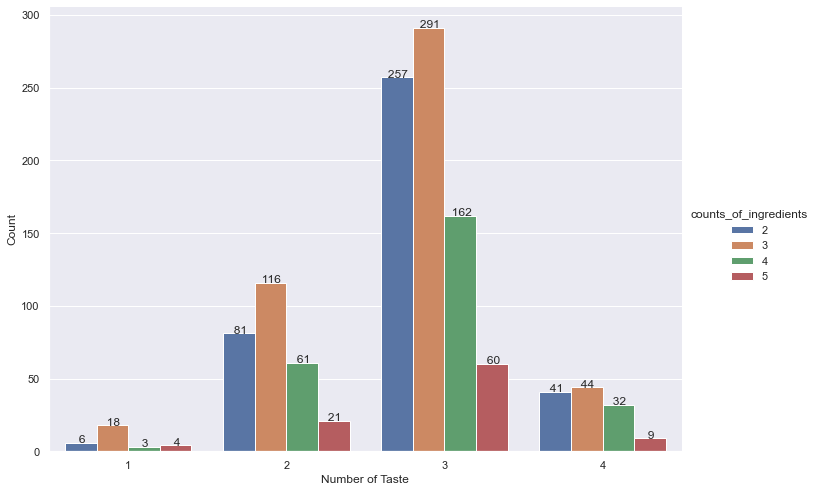

In [56]:
new = not_high.groupby(not_high['number_of_taste'])['counts_of_ingredients'].value_counts()
new = new.rename('Count').reset_index()
new = new.rename(columns = {'number_of_taste':'Number of Taste'})

g = sb.catplot(x='Number of Taste', y='Count', hue='counts_of_ingredients', kind='bar', data=new,
               height=7, aspect=1.4)

for p in g.ax.patches:
    txt = '          '+str(int(p.get_height()))
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt,ha='center')

plt.show()

In [ ]:
choc

In [ ]:
choc.to_csv('traintest.csv', index = False)